In [ ]:
!unzip /content/drive/MyDrive/Customer_Churn_Prediction/CustomerChurn.zip

Archive:  /content/drive/MyDrive/Customer_Churn_Prediction/CustomerChurn.zip
  inflating: Churn_Modelling.csv     


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = '/content/Churn_Modelling.csv'
df = pd.read_csv(data)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

### Clean the data

In [ ]:
# Remove unncessary data

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes     # Verify if columns has the right data type

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Strip whitespaces if any
df.Geography = df.Geography.str.strip()
df.Gender = df.Gender.str.strip()

# Convert the lower case
df.Geography = df.Geography.str.lower()
df.Gender = df.Gender.str.lower()

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Check for null values

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Visualize the data

In [ ]:
# Unique values of non-numeric columns

for col in df:
  if df[col].dtype == 'object':
    print(f'{col} : {df[col].unique()}')

Geography : ['france' 'spain' 'germany']
Gender : ['female' 'male']


In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

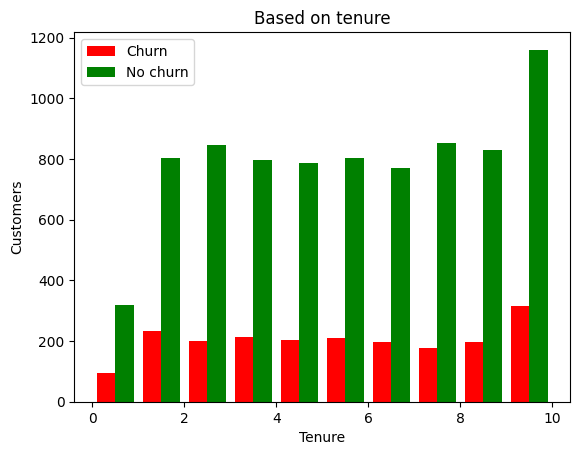

In [ ]:
churn_yes_tenure = df[df.Exited == 1].Tenure
churn_no_tenure = df[df.Exited == 0].Tenure

plt.xlabel('Tenure')
plt.ylabel('Customers')
plt.title('Based on tenure')
plt.hist([churn_yes_tenure, churn_no_tenure], color=['red','green'], label=['Churn', 'No churn'])
plt.legend()

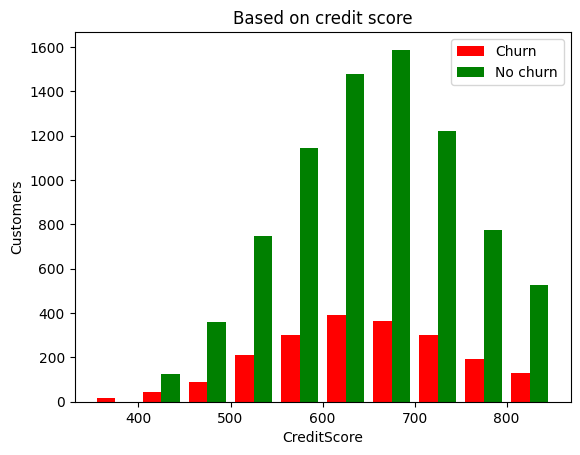

In [ ]:
churn_yes_cr_score = df[df.Exited == 1].CreditScore
churn_no_cr_score = df[df.Exited == 0].CreditScore

plt.xlabel('CreditScore')
plt.ylabel('Customers')
plt.title('Based on credit score')
plt.hist([churn_yes_cr_score, churn_no_cr_score], color=['red','green'], label=['Churn', 'No churn'])
plt.legend()

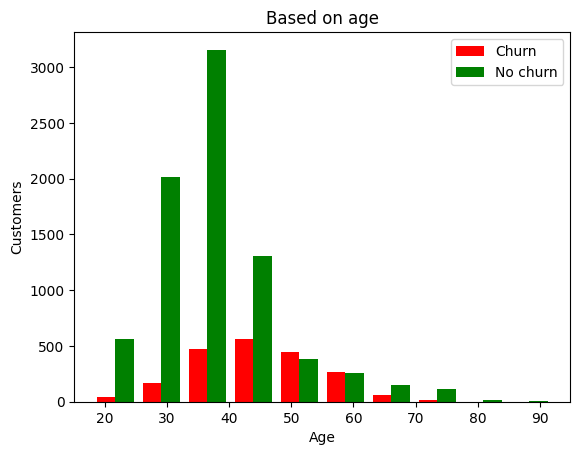

In [ ]:
churn_yes_age = df[df.Exited == 1].Age
churn_no_age = df[df.Exited == 0].Age

plt.xlabel('Age')
plt.ylabel('Customers')
plt.title('Based on age')
plt.hist([churn_yes_age, churn_no_age], color=['red','green'], label=['Churn', 'No churn'])
plt.legend()

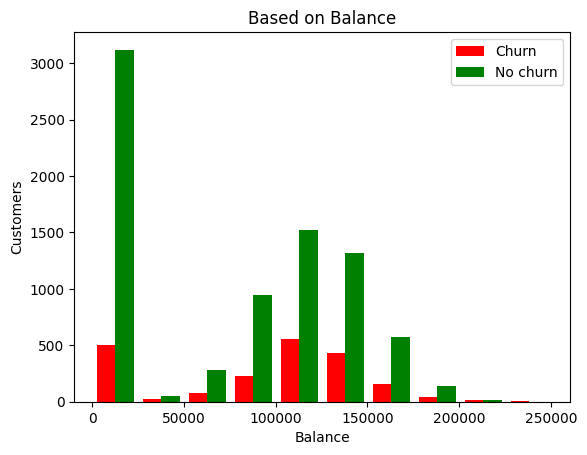

In [ ]:
churn_yes_bal = df[df.Exited == 1].Balance
churn_no_bal = df[df.Exited == 0].Balance

plt.xlabel('Balance')
plt.ylabel('Customers')
plt.title('Based on Balance')
plt.hist([churn_yes_bal, churn_no_bal], color=['red','green'], label=['Churn', 'No churn'])
plt.legend()

In [ ]:
# Get correlation for the varaibles

df.corr()

<ipython-input-147-a01aecc8c912>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<ipython-input-148-f36ec318f633>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

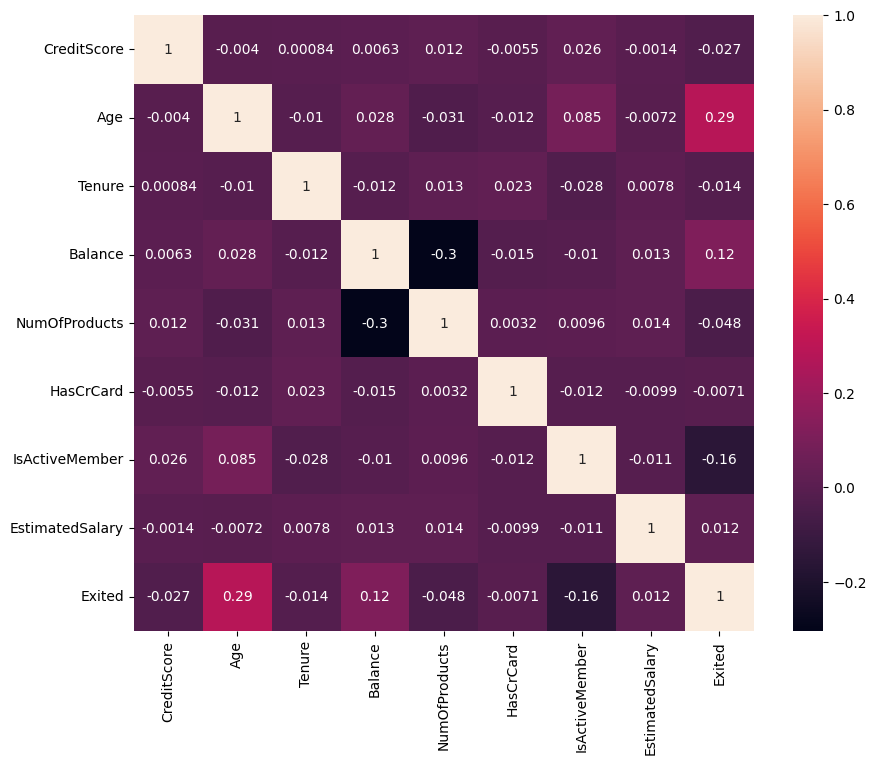

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

### Preprocess the data

In [ ]:
df.Gender.replace({'male': 0, 'female': 1}, inplace=True)

In [ ]:
df.Gender.unique()

array([1, 0])

In [ ]:
df_encoded = pd.get_dummies(data=df, columns=['Geography'])
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_france,Geography_germany,Geography_spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
# df_encoded = df.drop(['Gender', 'Geography'], axis='columns')

In [ ]:
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_france,Geography_germany,Geography_spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
# Scale the values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_france,Geography_germany,Geography_spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


### Train test split

In [ ]:
X = df_encoded.drop(['Exited'], axis='columns')
y = df_encoded.Exited

In [ ]:
X.shape, y.shape

((10000, 12), (10000,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((8000, 12), (2000, 12))

### Build and train model

In [ ]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(len(X_train.columns),), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

history = model.fit(X_train, y_train, epochs=150, callbacks=[callback], validation_split=0.2)

Epoch 1/150
200/200 [==============================] - 3s 6ms/step - loss: 0.5179 - accuracy: 0.7613 - val_loss: 0.4684 - val_accuracy: 0.8000
Epoch 2/150
200/200 [==============================] - 1s 5ms/step - loss: 0.4647 - accuracy: 0.7964 - val_loss: 0.4588 - val_accuracy: 0.8006
Epoch 3/150
200/200 [==============================] - 2s 12ms/step - loss: 0.4536 - accuracy: 0.8003 - val_loss: 0.4487 - val_accuracy: 0.8050
Epoch 4/150
200/200 [==============================] - 2s 11ms/step - loss: 0.4444 - accuracy: 0.8037 - val_loss: 0.4413 - val_accuracy: 0.8062
Epoch 5/150
200/200 [==============================] - 3s 13ms/step - loss: 0.4375 - accuracy: 0.8070 - val_loss: 0.4387 - val_accuracy: 0.8125
Epoch 6/150
200/200 [==============================] - 1s 7ms/step - loss: 0.4318 - accuracy: 0.8108 - val_loss: 0.4333 - val_accuracy: 0.8144
Epoch 7/150
200/200 [==============================] - 1s 6ms/step - loss: 0.4277 - accuracy: 0.8094 - val_loss: 0.4345 - val_accuracy: 0.8

In [ ]:
pred = model.predict(X_test)

pred[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.04547945],
       [0.0818475 ],
       [0.1044829 ],
       [0.16420248],
       [0.12891458]], dtype=float32)

In [ ]:

pred_discrete = []

for item in pred:
  if item > 0.5:
    pred_discrete.append(1)
  else:
    pred_discrete.append(0)



In [ ]:
model.evaluate(X_train, y_train)

250/250 [==============================] - 1s 4ms/step - loss: 0.3425 - accuracy: 0.8561


[0.34245818853378296, 0.856124997138977]

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8565


[0.34876906871795654, 0.8565000295639038]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, pred_discrete))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.69      0.54      0.60       407

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



Text(45.722222222222214, 0.5, 'True values')

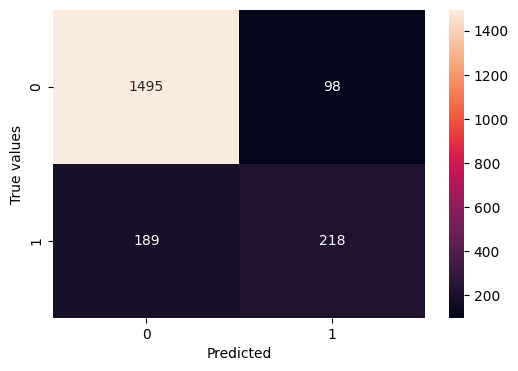

In [ ]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=pred_discrete)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True values')

**Remark**: False Negative is higher compared to False Positive which is not ideal for our use case. Becuase, False Negatives are like missed oppurtunities.
On the other hand, flase positive is like preventative measure.

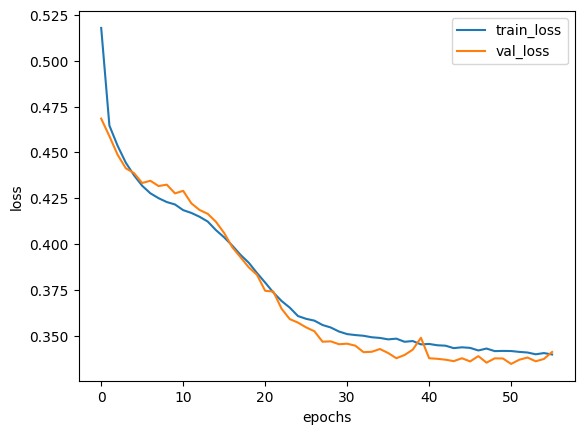

In [ ]:
plt.plot(pd.DataFrame(history.history['loss']))
plt.plot(pd.DataFrame(history.history['val_loss']))
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(['train_loss', 'val_loss'])

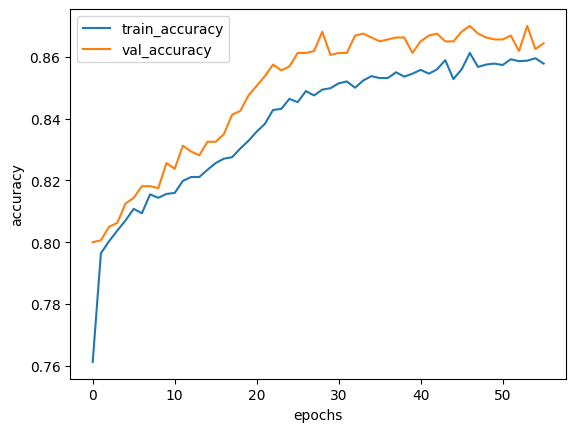

In [ ]:
plt.plot(pd.DataFrame(history.history['accuracy']))
plt.plot(pd.DataFrame(history.history['val_accuracy']))
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(['train_accuracy', 'val_accuracy'])

In [ ]:
# Random forest

from sklearn.ensemble import RandomForestClassifier

model_2 =  RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=1000).fit(X_train, y_train)

In [ ]:
# predict on test set
rfc_pred = model_2.predict(X_test)


print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.45      0.58       407

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced',n_jobs=-1).fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


In [ ]:
# predict on test set
lr_pred = lr_model.predict(X_test)


print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1593
           1       0.38      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



Text(45.722222222222214, 0.5, 'True values')

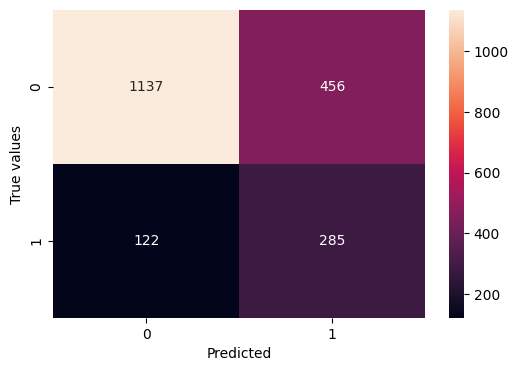

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=lr_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True values')

### Handle the imbalanced dataset

In [ ]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [ ]:
# Use class weights

In [ ]:
from sklearn.utils import class_weight
import numpy as np
class_weights = list(class_weight.compute_class_weight(class_weight='balanced',
                                             classes = np.unique(y_train),
                                             y = y_train))

In [ ]:
# Convert the weights into a dict object

weights_dict = {}

for index, weight in enumerate(class_weights):
    weights_dict[index] = weight

weights_dict

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [ ]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

model_bal = keras.Sequential([
    keras.layers.Dense(15, input_shape=(len(X_train.columns),), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_bal.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

history_bal = model_bal.fit(X_train, y_train, epochs=150, callbacks=[callback], validation_split=0.2, class_weight=weights_dict)

Epoch 1/150
200/200 [==============================] - 2s 4ms/step - loss: 0.6727 - accuracy: 0.6220 - val_loss: 0.6260 - val_accuracy: 0.6956
Epoch 2/150
200/200 [==============================] - 1s 3ms/step - loss: 0.6321 - accuracy: 0.6773 - val_loss: 0.6711 - val_accuracy: 0.6237
Epoch 3/150
200/200 [==============================] - 1s 3ms/step - loss: 0.6109 - accuracy: 0.6781 - val_loss: 0.5948 - val_accuracy: 0.7013
Epoch 4/150
200/200 [==============================] - 1s 3ms/step - loss: 0.5958 - accuracy: 0.6897 - val_loss: 0.6176 - val_accuracy: 0.6719
Epoch 5/150
200/200 [==============================] - 1s 4ms/step - loss: 0.5862 - accuracy: 0.6898 - val_loss: 0.5846 - val_accuracy: 0.7025
Epoch 6/150
200/200 [==============================] - 1s 4ms/step - loss: 0.5808 - accuracy: 0.6992 - val_loss: 0.5881 - val_accuracy: 0.7025
Epoch 7/150
200/200 [==============================] - 1s 3ms/step - loss: 0.5758 - accuracy: 0.7019 - val_loss: 0.6020 - val_accuracy: 0.6812

In [ ]:
pred_bal = model_bal.predict(X_test)

pred_bal[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.25444627],
       [0.36771244],
       [0.38537017],
       [0.44002253],
       [0.31619826]], dtype=float32)

In [ ]:

pred_discrete_bal = []

for item in pred_bal:
  if item > 0.5:
    pred_discrete_bal.append(1)
  else:
    pred_discrete_bal.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, pred_discrete_bal))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1593
           1       0.41      0.70      0.52       407

    accuracy                           0.74      2000
   macro avg       0.66      0.72      0.67      2000
weighted avg       0.81      0.74      0.76      2000



Text(45.722222222222214, 0.5, 'True values')

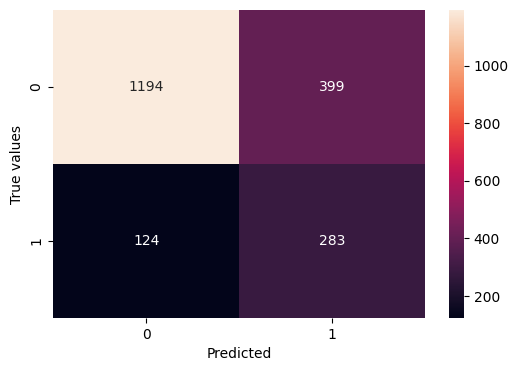

In [ ]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=pred_discrete_bal)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True values')

**Remark:** False Positives are higher which is better than having higher False Negatives.

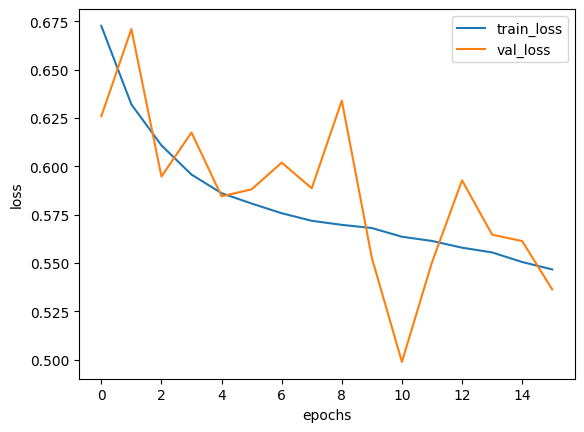

In [ ]:
plt.plot(pd.DataFrame(history_bal.history['loss']))
plt.plot(pd.DataFrame(history_bal.history['val_loss']))
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(['train_loss', 'val_loss'])

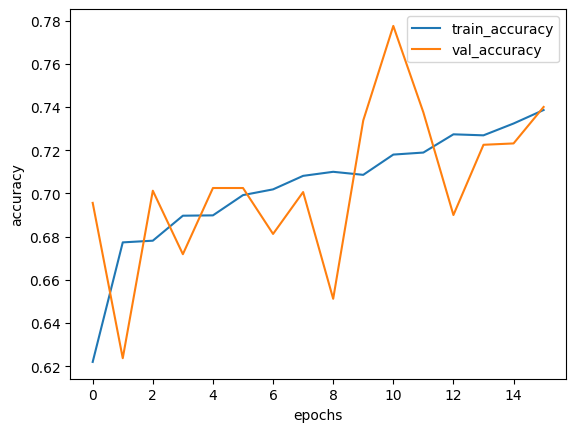

In [ ]:
plt.plot(pd.DataFrame(history_bal.history['accuracy']))
plt.plot(pd.DataFrame(history_bal.history['val_accuracy']))
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(['train_accuracy', 'val_accuracy'])

Remark: Val_loss and accuracy is highly fluctuating due to ----
* Val data is very less (lower samples for exited class) , hence the fluctuations in the val_loss and val_accuracy.

Refer
https://stackoverflow.com/questions/65213048/why-is-the-validation-loss-and-accuracy-oscillating-that-strong

https://stats.stackexchange.com/questions/345990/why-does-the-loss-accuracy-fluctuate-during-the-training-keras-lstm

https://www.quora.com/What-might-be-the-cause-of-the-many-fluctuations-in-validation-accuracy-during-training-of-my-deep-neural-network

In [ ]:
# Using SMOTE to balance the dataset

from imblearn.over_sampling import SMOTE

In [ ]:
X_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_france',
       'Geography_germany', 'Geography_spain'],
      dtype='object')

In [ ]:
# sampling_dict = {
#     1: 4000
# }

sm = SMOTE(random_state=42, k_neighbors=5, n_jobs=-1)

X_bal_train, y_bal_train = sm.fit_resample(X_train, y_train)

y_bal_train.value_counts()

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


1    6370
0    6370
Name: Exited, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow import keras
import math

tf.random.set_seed(42)

model_bal = keras.Sequential([
    keras.layers.Dense(12, input_shape=(len(X_train.columns),), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model_bal.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

history_bal = model_bal.fit(X_bal_train, y_bal_train, epochs=150, callbacks=[callback], validation_split=0.1, batch_size=84)

Epoch 1/150
137/137 [==============================] - 1s 4ms/step - loss: 0.6935 - accuracy: 0.5420 - val_loss: 0.7609 - val_accuracy: 0.0722
Epoch 2/150
137/137 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5662 - val_loss: 0.7795 - val_accuracy: 0.1232
Epoch 3/150
137/137 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.5797 - val_loss: 0.7751 - val_accuracy: 0.3053
Epoch 4/150
137/137 [==============================] - 0s 3ms/step - loss: 0.6631 - accuracy: 0.5990 - val_loss: 0.7797 - val_accuracy: 0.3838
Epoch 5/150
137/137 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6127 - val_loss: 0.7249 - val_accuracy: 0.4953
Epoch 6/150
137/137 [==============================] - 0s 3ms/step - loss: 0.6423 - accuracy: 0.6340 - val_loss: 0.7114 - val_accuracy: 0.5102
Epoch 7/150
137/137 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6429 - val_loss: 0.7041 - val_accuracy: 0.5361

In [ ]:
pred_bal = model_bal.predict(X_test)

pred_bal[:5]

63/63 [==============================] - 0s 2ms/step


array([[0.15192918],
       [0.27460608],
       [0.26190773],
       [0.25850305],
       [0.3034007 ]], dtype=float32)

In [ ]:

pred_discrete_bal = []

for item in pred_bal:
  if item > 0.5:
    pred_discrete_bal.append(1)
  else:
    pred_discrete_bal.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, pred_discrete_bal))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1593
           1       0.50      0.71      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000



Text(45.722222222222214, 0.5, 'True values')

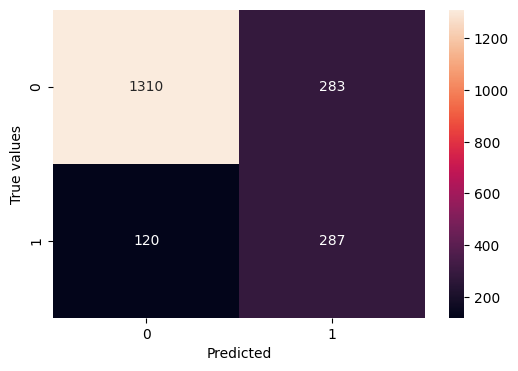

In [ ]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=pred_discrete_bal)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True values')

**Remarks:** False Negatives is reduced.

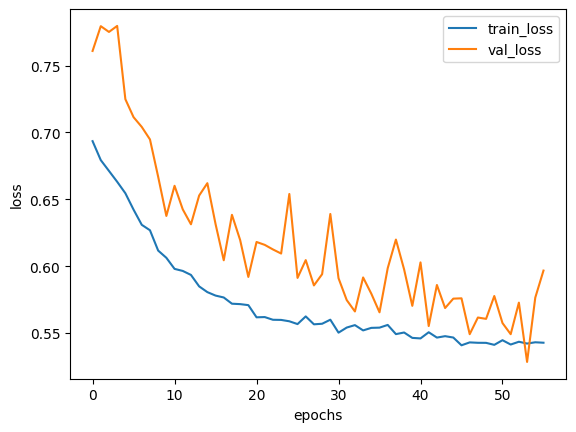

In [ ]:
plt.plot(pd.DataFrame(history_bal.history['loss']))
plt.plot(pd.DataFrame(history_bal.history['val_loss']))
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(['train_loss', 'val_loss'])

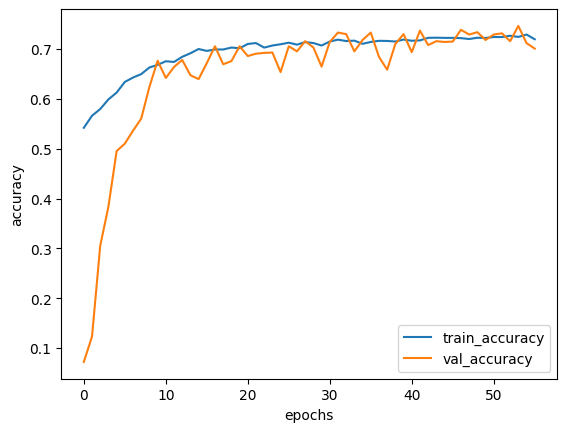

In [ ]:
plt.plot(pd.DataFrame(history_bal.history['accuracy']))
plt.plot(pd.DataFrame(history_bal.history['val_accuracy']))
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(['train_accuracy', 'val_accuracy'])

**Remarks:** Valdation loss and accuracy is erratic due to small validation dataset.

Changes made:
* Used SMOTE to generate synthetic samples to balance the dataset
* Added dropout layers
* Reduced the number of neurons
* Reduced the validation split
* Increased the batch size